In [36]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import curve_fit
import pandas as pd


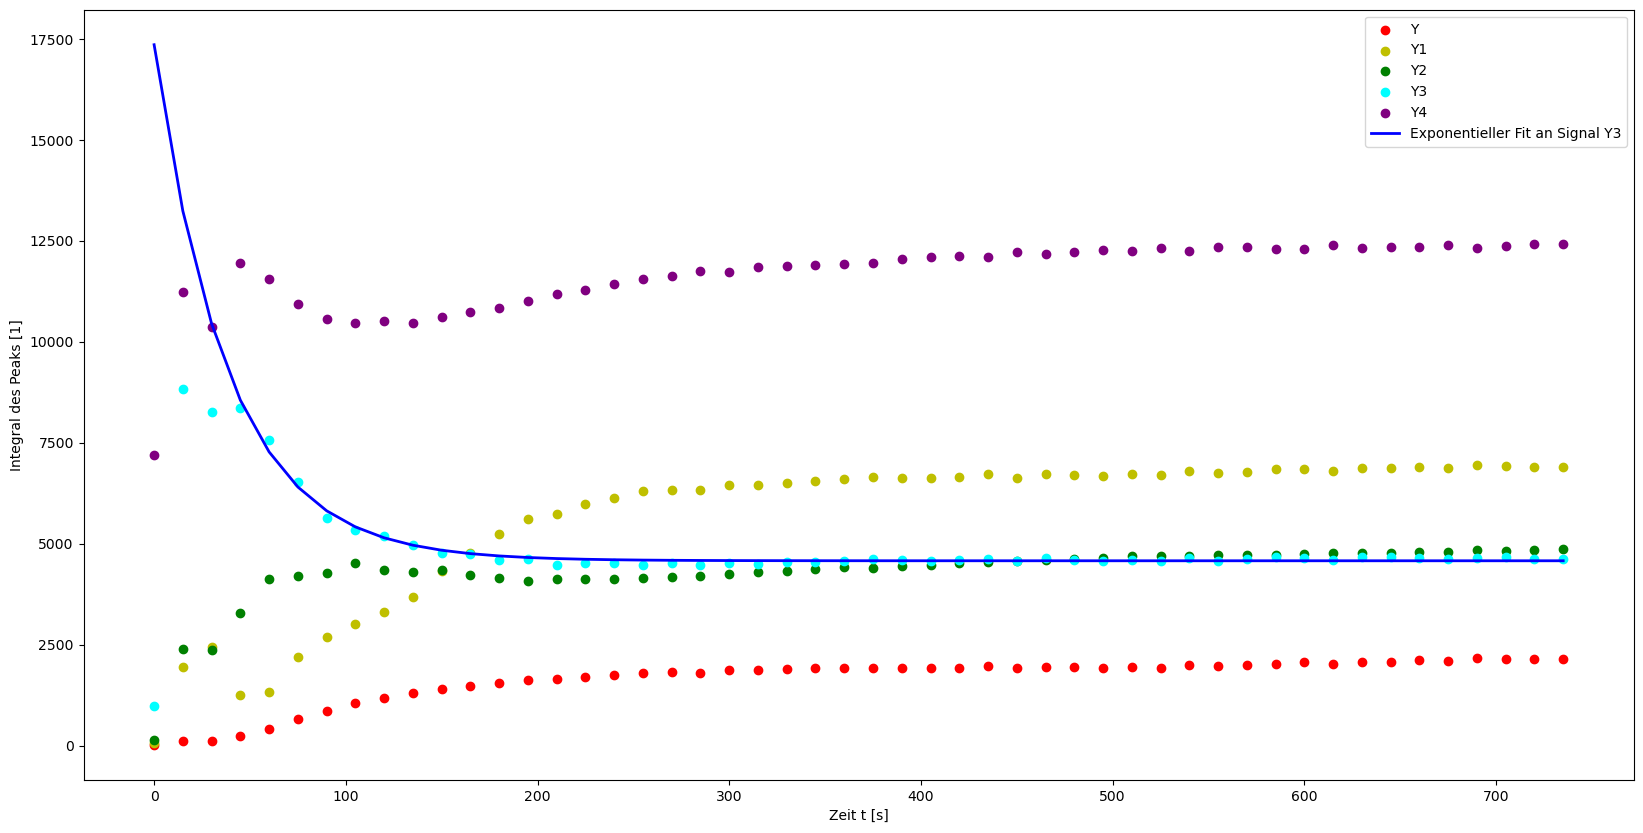

In [44]:
fig,ax = plt.subplots(figsize=(20,10))
daten = pd.read_excel("Gr15_RM.xlsx")
daten =daten.rename(columns={"ARR_DATA(I)":"Zeit","Integral(5.655359,4.963510)":"A","Integral(4.195248,3.524051)":"B","Integral(3.575682,3.059376)":"C","Integral(2.460462,2.014375)":"D","Integral(1.983396,1.421656)":"E"})
ax.scatter(daten["Zeit"],daten["A"],label="Y",c="red")
ax.scatter(daten["Zeit"],daten["B"],label="Y1",c="y")
ax.scatter(daten["Zeit"],daten["C"],label="Y2",c="g")
ax.scatter(daten["Zeit"],daten["D"],label="Y3",c="cyan")
ax.scatter(daten["Zeit"],daten["E"],label="Y4",c="purple")
daten =daten.rename(columns={
    "B":"OH" # Vielleicht
})
ax.legend()

x_data = np.array(list(daten["Zeit"]))
y_Data = np.array(list(daten["D"]))






x_fit_data = x_data[3:]
y_fit_data = y_Data[3:]
x_fit_adj = x_fit_data - x_fit_data[0] # x for fit starts at 0

# --- 3. Define the Exponential Decay Function ---
def exponential_decay(x, A, B, C):
    """Model: y = A * exp(-B * x) + C"""
    return A * np.exp(-B * x) + C

# --- 4. Fitting Parameters (from previous step's fit on cleaned data) ---
# [A, B, C] initial guesses used for the fit:
p0 = [3700, 0.005, 4600]

# Perform the fit again to ensure parameters are consistent:
try:
    popt, pcov = curve_fit(exponential_decay, x_fit_adj, y_fit_data, p0=p0, maxfev=5000)
    A_fit, B_fit, C_fit = popt
except RuntimeError:
    # Use fallback values if fitting fails (should not happen based on prior successful runs)
    A_fit, B_fit, C_fit = 3753.385, 0.01958, 4578.411 

# --- 5. Generate Fitted Curve over the full original x-range ---
# To plot the fitted curve on the "non-cleaned" graph (i.e., using the original x-axis):
# We need to map the full original x-data (x_data) back to the adjusted x used for the fit (x_fit_adj).
# The shift applied to x_fit_data was x_fit_data[0], which is x_data[3] (44.9879).
x_offset = x_data[3]
x_full_adj = x_data - x_offset # Adjusting the full original x-data
y_fit_full = exponential_decay(x_full_adj, A_fit, B_fit, C_fit)

# --- 6. Plot the "Non-Cleaned" Graph ---

# Plot all original data points

# Highlight the points used for the fit (starting from index 3)

# Plot the fitted curve using the original x-axis
ax.plot(x_data, y_fit_full, 'b-', linewidth=2, label=f'Exponentieller Fit an Signal Y3')
popt
ax.legend()
ax.set_xlabel("Zeit t [s]")
ax.set_ylabel("Integral des Peaks [1]")

fig.savefig("reaction_monitoring.pdf")

In [40]:
print(daten.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & Zeit & A & OH & C & D & E \\
\midrule
1 & 0.000000 & 20.375300 & 71.883500 & 126.635000 & 969.372000 & 7190.410000 \\
2 & 14.981800 & 107.707000 & 1934.060000 & 2381.180000 & 8826.970000 & 11241.500000 \\
3 & 29.999600 & 116.635000 & 2434.250000 & 2368.620000 & 8269.320000 & 10354.100000 \\
4 & 44.987900 & 238.017000 & 1248.350000 & 3289.640000 & 8366.320000 & 11951.900000 \\
5 & 59.980900 & 408.833000 & 1320.270000 & 4133.850000 & 7572.500000 & 11561.900000 \\
6 & 74.993700 & 658.211000 & 2183.590000 & 4189.720000 & 6528.440000 & 10935.800000 \\
7 & 89.992500 & 859.432000 & 2692.570000 & 4275.790000 & 5640.450000 & 10555.000000 \\
8 & 104.988000 & 1062.770000 & 3008.800000 & 4531.730000 & 5338.330000 & 10463.200000 \\
9 & 119.977000 & 1188.470000 & 3312.980000 & 4353.520000 & 5191.600000 & 10501.100000 \\
10 & 134.986000 & 1305.730000 & 3682.270000 & 4304.440000 & 4960.380000 & 10460.400000 \\
11 & 149.987000 & 1401.580000 & 4314.540000 & 4358.1100


--- NEW Fitted Parameters (Ignoring First 3 Points) ---
A (Amplitude): 3977.499
B (Decay Constant): 0.02594
C (Asymptote/Offset): 4575.121

Fitted Equation:
y = 3977.499 * exp(-0.02594 * x) + 4575.121


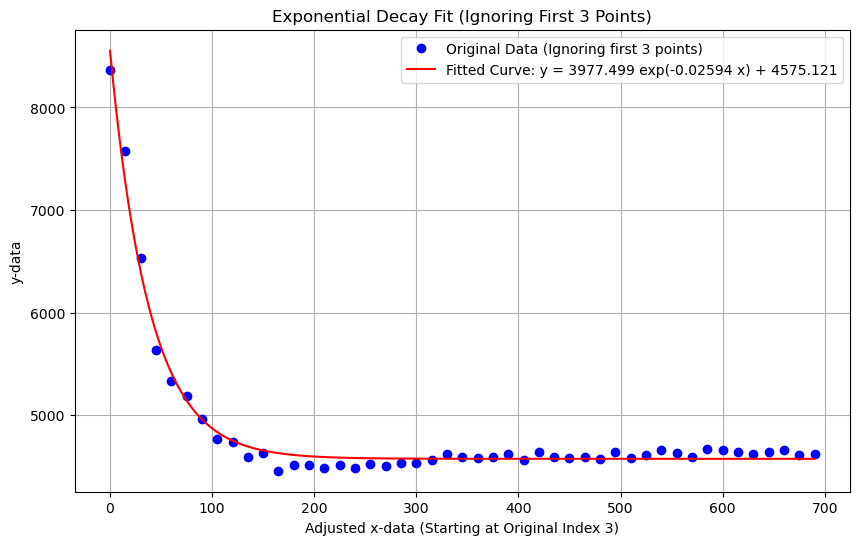

In [39]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# --- 1. Provided Data ---
y_Data = np.array([
    969.372, 8826.97, 8269.32, 8366.32, 7572.5, 6528.44, 5640.45, 5338.33,
    5191.6, 4960.38, 4767.46, 4734.56, 4592.22, 4628.58, 4459.07, 4517.67,
    4516.34, 4480.81, 4517.7, 4481.71, 4526.4, 4504.98, 4534.4, 4535.72,
    4567.45, 4619.68, 4590.22, 4578.93, 4593.2, 4622.31, 4561.92, 4638.24,
    4591.55, 4581.01, 4589.56, 4577.28, 4639.39, 4579.65, 4610.52, 4660.86,
    4636.51, 4591.51, 4666.14, 4665.66, 4643.11, 4624.57, 4646.17, 4661.89,
    4614.47, 4622.5
])
x_data = np.array([
    0.0, 14.9818, 29.9996, 44.9879, 59.9809, 74.9937, 89.9925, 104.988,
    119.977, 134.986, 149.987, 164.975, 179.988, 194.984, 209.986, 224.987,
    240.009, 254.992, 269.994, 284.994, 299.994, 314.987, 329.987, 344.984,
    359.978, 374.988, 389.99, 404.987, 419.982, 434.981, 449.976, 464.99,
    479.986, 494.986, 509.993, 524.994, 539.995, 554.992, 569.994, 584.987,
    599.995, 614.988, 629.991, 644.983, 659.984, 674.99, 689.976, 704.984,
    719.996, 734.991
])

# --- 2. Clean and Adjust Data (Ignoring the first 3 points, indices 0, 1, 2) ---
x_data_clean = x_data[3:]
y_data_clean = y_Data[3:]

# Adjust x-data so the first point used for fitting (Original Index 3) is at x=0
x_data_clean_adj = x_data_clean - x_data_clean[0]

# --- 3. Define the Exponential Decay Function ---
def exponential_decay(x, A, B, C):
    """Model: y = A * exp(-B * x) + C"""
    return A * np.exp(-B * x) + C

# --- 4. Initial Guesses ---
# C (Asymptote) is still around the final y-value: ~4600
# The new starting y-value (index 3) is 8366.32
# A (Amplitude) is roughly 8366 - 4600 = 3766
p0 = [3700, 0.005, 4600]

# --- 5. Fit the Data ---
try:
    popt, pcov = curve_fit(exponential_decay, x_data_clean_adj, y_data_clean, p0=p0, maxfev=5000)
    A_fit, B_fit, C_fit = popt

    # --- Print Results ---
    print("\n--- NEW Fitted Parameters (Ignoring First 3 Points) ---")
    print(f"A (Amplitude): {A_fit:.3f}")
    print(f"B (Decay Constant): {B_fit:.5f}")
    print(f"C (Asymptote/Offset): {C_fit:.3f}")

    print("\nFitted Equation:")
    print(f"y = {A_fit:.3f} * exp(-{B_fit:.5f} * x) + {C_fit:.3f}")

    # --- 6. Plot the Results ---
    x_fit = np.linspace(x_data_clean_adj.min(), x_data_clean_adj.max(), 500)
    y_fit = exponential_decay(x_fit, A_fit, B_fit, C_fit)

    plt.figure(figsize=(10, 6))
    plt.plot(x_data_clean_adj, y_data_clean, 'o', color='blue', label='Original Data (Ignoring first 3 points)')
    plt.plot(x_fit, y_fit, 'r-', label=f'Fitted Curve: y = {A_fit:.3f} exp(-{B_fit:.5f} x) + {C_fit:.3f}')
    plt.title('Exponential Decay Fit (Ignoring First 3 Points)')
    plt.xlabel('Adjusted x-data (Starting at Original Index 3)')
    plt.ylabel('y-data')
    plt.legend()
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"Fitting failed: {e}. Try adjusting initial guesses or increasing maxfev.")